In [68]:
import pandas as pd 
import os 

In [69]:
files = os.listdir("/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result")

In [70]:
files.sort()

In [71]:
files

['1_dyna.new.counts.txt',
 '1_dyna.old.counts.txt',
 '2_dyna.new.counts.txt',
 '2_dyna.old.counts.txt',
 '3_dyna.new.counts.txt',
 '3_dyna.old.counts.txt',
 '4_dyna.new.counts.txt',
 '4_dyna.old.counts.txt',
 '5_dyna.new.counts.txt',
 '5_dyna.old.counts.txt',
 '6_dyna.new.counts.txt',
 '6_dyna.old.counts.txt']

In [72]:
samples = [i.split('.')[0] for i in files]

In [73]:
samples

['1_dyna',
 '1_dyna',
 '2_dyna',
 '2_dyna',
 '3_dyna',
 '3_dyna',
 '4_dyna',
 '4_dyna',
 '5_dyna',
 '5_dyna',
 '6_dyna',
 '6_dyna']

In [74]:
files = [f"/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/{i}" for i in files]

In [75]:
files

['/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/1_dyna.new.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/1_dyna.old.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/2_dyna.new.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/2_dyna.old.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/3_dyna.new.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/3_dyna.old.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/4_dyna.new.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/4_dyna.old.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/5_dyna.new.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysis/20230904/new_old_count/result/5_dyna.old.counts.txt',
 '/SGRNJ06/randd/PROJECT/StandardAnalysi

In [76]:
for i in files:
    df = pd.read_csv(i, sep='\t')
    sample = '_'.join(i.split('/')[-1].split('.')[0:2])
    df.sort_values("Counts", ascending=False).head(2000).to_csv(f"/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/{sample}.txt", sep='\t')

In [128]:
df1 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/5_dyna_old.txt", sep='\t')
df2 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/6_dyna_old.txt", sep='\t')

In [129]:
df1 = df1.rename(columns={"Unnamed: 0": "gene"})
df2 = df2.rename(columns={"Unnamed: 0": "gene"})

In [130]:
pd.merge(df1, df2, on = "gene", suffixes=['_1','_2']).to_csv("/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/dyna_old_merge_56.txt", sep='\t')

In [183]:
import pandas as pd
from pandas import Series
import glob
import plotly
import plotly.express as px  # import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import math

import plotly.io as pio
#pio.templates.default = 'plotly_white'
def calc_corr(a,b):
    s1 = Series(a)
    s2 = Series(b)
    return round(s1.corr(s2), 3)

In [367]:
# plot
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/dyna_old_merge_56.txt", sep='\t')

In [368]:
df["pct_1"] = (df["Counts_1"] / sum(df["Counts_1"]) * 10000)
df["pct_2"] = (df["Counts_2"] / sum(df["Counts_2"]) * 10000)

In [369]:
df["pct_1"] = df["pct_1"].apply(lambda x: math.log(x+1))
df["pct_2"] = df["pct_2"].apply(lambda x: math.log(x+1))

In [370]:
df.sort_values("Counts_1", ascending=False)

,Unnamed: 0,gene,Counts_1,Counts_2,pct_1,pct_2
0,0,FTL,321704,424766,6.036941,6.257140
1,1,RPS19,133906,179217,5.163791,5.396821
2,2,KRT81,93730,170031,4.809520,5.344449
3,3,TMSB10,89073,93264,4.758984,4.747825
4,4,RPLP1,87946,121222,4.746361,5.008013
...,...,...,...,...,...,...
1750,1750,CENPM,722,862,0.661266,0.721119
1751,1751,NSMCE2,721,891,0.660595,0.738257
1752,1752,CXCL5,721,707,0.660595,0.624182
1753,1753,BOLA1,720,981,0.659925,0.789646


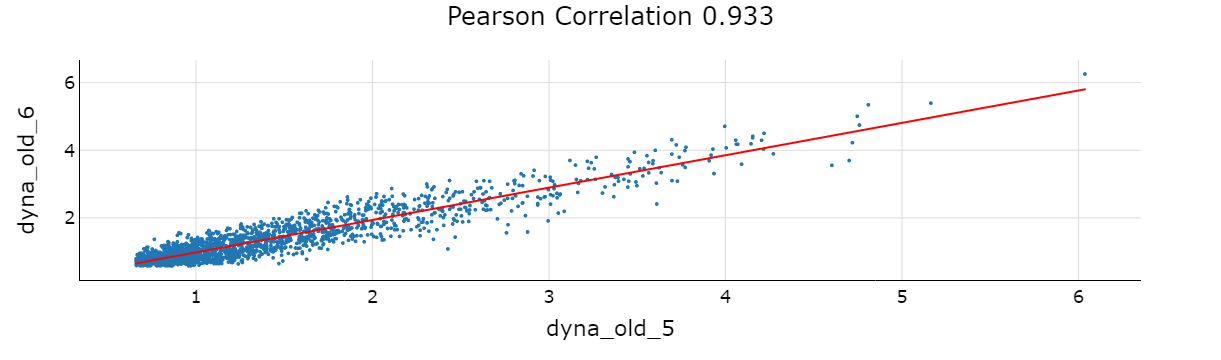

In [371]:
fig = px.scatter(# scatter绘制散点图
    df,
    x="pct_1",    # x轴
    y="pct_2",  # y轴
    labels = calc_corr(df["pct_1"], df["pct_2"]),  color_discrete_sequence=['#1F77B4'],
    trendline_color_override="red", trendline="ols",
    #width=1680, height=1024
)
fig.update_traces(marker_size=4)
fig.update_layout(title={"text":f'Pearson Correlation {calc_corr(df["pct_1"], df["pct_2"])}',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "dyna_old_5", yaxis_title = "dyna_old_6", font=dict(size=18,color="Black"),
                  xaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  yaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  plot_bgcolor="#FFFFFF")
 
fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/rna/20230920gene_exp/dyna_old_56.pdf", scale=4)
fig.show()

0.3010299956639812